In [1]:
import tensorflow as tf

/home/asherif844/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
print(tf.__version__)

1.4.1


In [3]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('MNIST/', one_hot=True)

Extracting MNIST/train-images-idx3-ubyte.gz
Extracting MNIST/train-labels-idx1-ubyte.gz
Extracting MNIST/t10k-images-idx3-ubyte.gz
Extracting MNIST/t10k-labels-idx1-ubyte.gz


In [4]:
import os
os.listdir('MNIST/')

['t10k-images-idx3-ubyte.gz',
 'images',
 't10k-labels-idx1-ubyte.gz',
 'train-labels-idx1-ubyte.gz',
 'train-images-idx3-ubyte.gz']

In [5]:
print('Image Inventory')
print('----------')
print('Training: {}'.format(len(data.train.labels)))
print('Testing:  {}'.format(len(data.test.labels)))
print('----------')

Image Inventory
----------
Training: 55000
Testing:  10000
----------


In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

-----------------
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


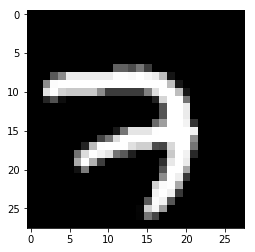

-----------------
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


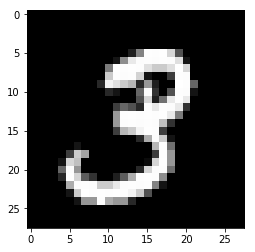

In [7]:
for i in range(2):
    image = data.train.images[i]
    image = np.array(image, dtype='float')
    label = data.train.labels[i]
    pixels = image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    print('-----------------')
    print(label)
    plt.show()
    

In [8]:
if not os.path.exists('MNIST/images'):
    os.makedirs('MNIST/images/')
os.chdir('MNIST/images/')

In [9]:
from matplotlib import image
for i in range(1,10):
    png = data.train.images[i]
    png = np.array(png, dtype='float')
    pixels = png.reshape((28, 28))
    image.imsave('image_no_{}.png'.format(i), pixels, cmap = 'gray')

In [10]:
print(os.listdir())

['image_no_9.png', 'image_no_3.png', 'image_no_4.png', 'image_no_7.png', 'output', 'image_no_2.png', 'image_no_5.png', 'image_no_8.png', 'image_no_1.png', 'image_no_6.png']


In [11]:
from Augmentor import Pipeline

In [12]:
augmentor = Pipeline('/home/asherif844/sparkNotebooks/Ch03/MNIST/images')

Initialised with 9 image(s) found.
Output directory set to /home/asherif844/sparkNotebooks/Ch03/MNIST/images/output.

In [13]:
augmentor.rotate(probability=0.9, max_left_rotation=25, max_right_rotation=25)

In [14]:
for i in range(1,3):
    augmentor.sample(10)

Processing <PIL.Image.Image image mode=RGBA size=28x28 at 0x7FE18C76FA58>: 100%|██████████| 10/10 [00:00<00:00, 160.13 Samples/s]
Processing <PIL.Image.Image image mode=RGBA size=28x28 at 0x7FE18C76F898>: 100%|██████████| 10/10 [00:00<00:00, 125.24 Samples/s]


In [15]:
xtrain = data.train.images
ytrain = np.asarray(data.train.labels)
xtest = data.test.images 
ytest = np.asarray(data.test.labels)

In [16]:
xtrain = xtrain.reshape( xtrain.shape[0],28,28,1)
xtest = xtest.reshape(xtest.shape[0],28,28,1)
ytest= ytest.reshape(ytest.shape[0],10)
ytrain = ytrain.reshape(ytrain.shape[0],10)

In [17]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(55000, 28, 28, 1)
(55000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [18]:
import keras
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D

K.set_image_dim_ordering('tf')

model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5),activation='relu', input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='sigmoid'))


Using TensorFlow backend.


In [19]:
model.compile(optimizer='adam',loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [20]:
model.fit(xtrain,ytrain,batch_size=512,
          epochs=5,
          validation_data=(xtest, ytest))

Train on 55000 samples, validate on 10000 samples
Epoch 1/5
55000/55000 [==============================] - 46s 832us/step - loss: 0.3617 - acc: 0.9032 - val_loss: 0.1214 - val_acc: 0.9651
Epoch 2/5
55000/55000 [==============================] - 44s 797us/step - loss: 0.0928 - acc: 0.9731 - val_loss: 0.0809 - val_acc: 0.9770
Epoch 3/5
55000/55000 [==============================] - 44s 796us/step - loss: 0.0555 - acc: 0.9837 - val_loss: 0.0521 - val_acc: 0.9839
Epoch 4/5
55000/55000 [==============================] - 42s 756us/step - loss: 0.0410 - acc: 0.9881 - val_loss: 0.0521 - val_acc: 0.9823
Epoch 5/5
55000/55000 [==============================] - 43s 782us/step - loss: 0.0309 - acc: 0.9909 - val_loss: 0.0457 - val_acc: 0.9861


In [21]:
stats = model.evaluate(xtest, ytest)
print('The accuracy rate is {}%'.format(round(stats[1],3)*100))
print('The loss rate is {}%'.format(round(stats[0],2)*100))

10000/10000 [==============================] - 3s 324us/step
The accuracy rate is 98.6%
The loss rate is 5.0%


In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2359424   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 2,361,546
Trainable params: 2,361,546
Non-trainable params: 0
_________________________________________________________________
